In [61]:
from unseen import fileio
from unseen import spatial_selection

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import regionmask
import geopandas as gp
import xarray as xr
import numpy as np
import cartopy.io.shapereader as shpreader

## Shapefile

In [62]:
shapefile = '/g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.shp'

In [63]:
shapes = gp.read_file(shapefile)

In [64]:
#reader = shpreader.Reader(shapefile)
#regions = reader.records()
#region_list = []
#for region in regions:
#    region_list.append(region)
#region_list

## Processed file

In [65]:
infile = '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19950501/atmos_isobaric_daily.zarr.zip'

In [66]:
ds = fileio.open_dataset(
    infile,
    metadata_file='/home/599/dbi599/forks/unseen/config/dataset_cafe_daily.yml',
    variables=['pr'],
)

In [67]:
ds_subset = ds.isel({'time': 0, 'ensemble': 0})
ds_subset

<xarray.Dataset>
Dimensions:   (lat: 90, lon: 144)
Coordinates:
    ensemble  int64 1
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    time      object 1995-05-01 12:00:00
Data variables:
    pr        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [68]:
ds_selection = spatial_selection.select_shapefile_regions(ds_subset, '/g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shp')

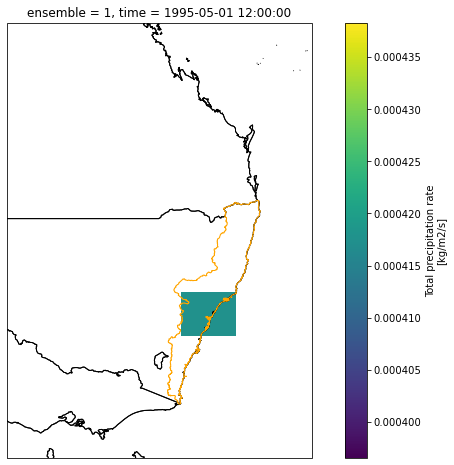

In [69]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_selection['pr'].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_geometries(shapes.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='orange')
ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())
plt.show()

## Solution notes

https://github.com/regionmask/regionmask/issues/225#issuecomment-915033614

In [20]:
regions = regionmask.defined_regions.srex
regions

<regionmask.Regions>
Name:     SREX
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...

Regions:
 1 ALA       Alaska/N.W. Canada
 2 CGI     Canada/Greenl./Icel.
 3 WNA         W. North America
 4 CNA         C. North America
 5 ENA         E. North America
..  ..                      ...
22 EAS                  E. Asia
23 SAS                  S. Asia
24 SEA                S.E. Asia
25 NAU             N. Australia
26 SAU S. Australia/New Zealand

[26 regions]

In [21]:
regions.polygons

In [22]:
regions.numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [ ]:
#regionmask.core.mask._mask_rasterize(lat, lon, regions.polygons, regions.numbers, all_touched=True)

## Solution implementation

In [70]:
lons = ds_subset["lon"].values
lats = ds_subset["lat"].values

In [81]:
np.diff(lons)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [82]:
np.diff(lats)

array([1.51685393, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247191,
       2.02247191, 2.02247191, 2.02247191, 2.02247191, 2.02247

In [73]:
type(shapes.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [74]:
[shapes.geometry[0]]

In [75]:
mask = regionmask.core.mask._mask_rasterize(lons, lats, [shapes.geometry[0]], [1], all_touched=True)

In [76]:
mask.shape

(90, 144)

In [77]:
#mask = xr.where(mask.notnull(), True, False)
ds_new = ds_subset.where(~np.isnan(mask))

In [78]:
ds_new

<xarray.Dataset>
Dimensions:   (lat: 90, lon: 144)
Coordinates:
    ensemble  int64 1
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    time      object 1995-05-01 12:00:00
Data variables:
    pr        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

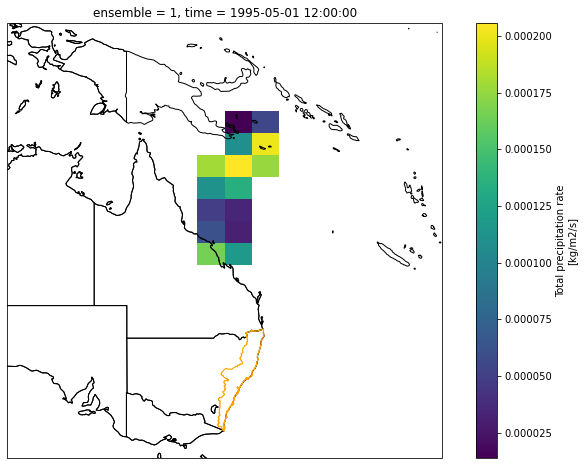

In [79]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds_new['pr'].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.add_geometries(shapes.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='orange')
ax.set_extent([130, 170, 0, -40], crs=ccrs.PlateCarree())
plt.show()